# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, f1_score, recall_score)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
data = pd.read_csv('Dataset_inisiasi.csv')
print(data.info())
print(data['Cluster'].value_counts())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         2394 non-null   int64  
 1   Fat                   2394 non-null   float64
 2   Saturated Fats        2394 non-null   float64
 3   Monounsaturated Fats  2394 non-null   float64
 4   Polyunsaturated Fats  2394 non-null   float64
 5   Carbohydrates         2394 non-null   float64
 6   Sugars                2394 non-null   float64
 7   Protein               2394 non-null   float64
 8   Dietary Fiber         2394 non-null   float64
 9   Cholesterol           2394 non-null   float64
 10  Sodium                2394 non-null   float64
 11  Water                 2394 non-null   float64
 12  Vitamin A             2394 non-null   float64
 13  Vitamin B1            2394 non-null   float64
 14  Vitamin B11           2394 non-null   float64
 15  Vitamin B12          

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Cluster
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07,1
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.1,1
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.4,1
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,1
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
X = data.drop(['Cluster', 'Nutrition Density'], axis=1)
k=0.2
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1675, 33)
Test set shape: (719, 33)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

XGBoost (Extreme Gradient Boosting) adalah algoritma boosting berbasis pohon keputusan yang membangun model secara bertahap untuk memperbaiki kesalahan prediksi sebelumnya. Algoritma ini cepat, akurat, dan dilengkapi regularisasi untuk mengurangi overfitting. XGBoost juga efektif menangani fitur numerik, missing value, dan bekerja baik pada data kompleks.

Random Forest merupakan algoritma berbasis pohon keputusan yang bekerja dengan membangun beberapa pohon keputusan secara acak dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting. Keuntungannya, kemampuan untuk menangani fitur numerik, robust terhadap outlier, dan bekerja dengan baik pada dataset dengan banyak fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

XGBOOST
Accuracy: 0.9777468706536857
F1-Score (macro): 0.9471692567691685
Recall (macro): 0.9427378873854213

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        87
           1       0.99      0.99      0.99       632

    accuracy                           0.98       719
   macro avg       0.95      0.94      0.95       719
weighted avg       0.98      0.98      0.98       719



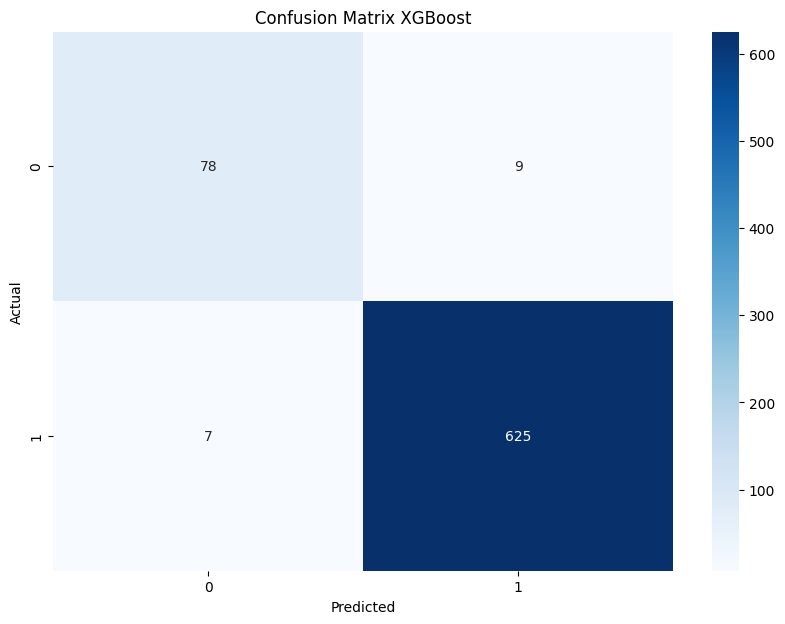

In [22]:
print("XGBOOST\n==================\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1-Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest
Akurasi: 0.9833101529902643
F1-Score (macro): 0.9599740211542029
Recall (macro): 0.9508584315437218

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        87
           1       0.99      0.99      0.99       632

    accuracy                           0.98       719
   macro avg       0.97      0.95      0.96       719
weighted avg       0.98      0.98      0.98       719



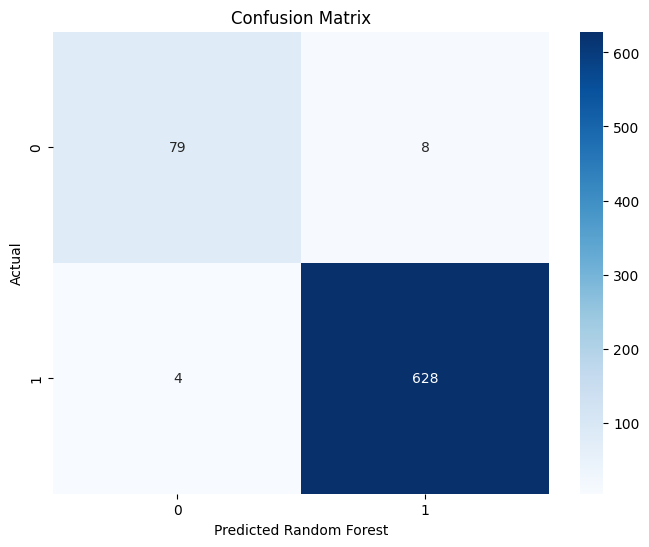

In [23]:
print("Random Forest\n===============================================================")
y_pred2 = model2.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred2))
print("F1-Score (macro):", f1_score(y_test, y_pred2, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred2, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Random Forest")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.
- XGBoost: Model XGBoost memberikan performa klasifikasi yang sangat tinggi dengan keseimbangan precision dan recall yang bagus, terutama pada data yang tidak seimbang. 
* - Kelebihan : 
* - - Terbukti dari hasil evaluasi (accuracy ~97.77%, F1-score ~0.95), XGBoost memberikan prediksi yang sangat akurat, bahkan pada data dengan distribusi kelas yang tidak seimbang.
* - - Kemampuan Generalisasi yang Baik, Model tidak hanya akurat pada kelas mayoritas, tapi juga cukup baik menangani kelas minoritas (precision & recall kelas 0 masing-masing 0.92 dan 0.90).
* - - Menangani Overfitting dengan Baik, XGBoost memiliki built-in regularization (L1 dan L2) yang membantu mencegah overfitting, terutama pada dataset yang kompleks.
* - - Handling Missing Values, XGBoost mampu menangani nilai yang hilang tanpa preprocessing tambahan.
* - - Skalabilitas, Cepat untuk dataset besar karena menggunakan optimasi paralel dan cache-aware.
* - Kekurangan : 
* - - Kompleksitas Model, Cukup sulit untuk diinterpretasikan jika dibandingkan dengan model seperti decision tree tunggal atau logistic regression. Kurang cocok jika interpretasi model sangat penting.
* - - Waktu Training Lebih Lama, Meskipun cepat dibandingkan boosting biasa, tetap lebih lambat dibanding model sederhana seperti Logistic Regression atau Decision Tree — terutama jika jumlah data dan fitur sangat besar.
* - - Butuh Hyperparameter Tuning, Agar hasil optimal, XGBoost membutuhkan penyesuaian hyperparameter (seperti max_depth, learning_rate, n_estimators, dll) yang bisa memakan waktu.
* - - Sensitif terhadap Skala Fitur (relatif), Meskipun tidak se-sensitif SVM atau k-NN, model ini tetap mendapat manfaat dari scaling fitur, seperti yang kamu lakukan dengan StandardScaler.

- Random Forest: Model Random Forest menunjukkan performa klasifikasi yang sangat tinggi dan stabil pada data uji: 
* - Kelebihan : 
* - - Akurasi Tinggi & Stabil, Akurasi model sangat baik (98.33%), dan F1-score macro mencapai 0.96 — menunjukkan model konsisten menangani kedua kelas.
* - - Robust terhadap Overfitting, Dengan membangun banyak pohon dan melakukan voting, Random Forest cenderung tidak overfit seperti pohon keputusan tunggal.
* - - Mampu Menangani Data Tidak Seimbang, Terbukti mampu memprediksi kelas minoritas (kelas 0) cukup baik, dengan recall 0.91 dan precision 0.95.
* - - Tidak Perlu Banyak Preprocessing, Tidak sensitif terhadap skala data, tidak memerlukan normalisasi atau standar deviasi (meskipun tetap bisa membantu).
* - - Mendeteksi Pentingnya Fitur, Random Forest menyediakan feature importance bawaan, berguna untuk interpretasi dan reduksi dimensi.
* - Kekurangan : 
* - - Kurang Interpretatif, Meskipun lebih mudah dibanding XGBoost, struktur model masih kompleks untuk ditafsirkan secara langsung (karena banyak pohon).
* - - Lebih Lambat untuk Prediksi Real-Time, Karena harus menggabungkan hasil dari banyak pohon, prediksi bisa lebih lambat dibandingkan model sederhana.
* - - Kurang Optimal untuk Dataset Sangat Besar, Untuk dataset dengan jutaan baris, Random Forest bisa lebih berat dari segi memori dan waktu dibanding model lain seperti XGBoost yang lebih efisien.
* - - Bisa Terlalu Berat Jika Tanpa Tuning, Default-nya sudah cukup bagus, tapi untuk performa maksimal tetap butuh penyesuaian jumlah pohon (n_estimators), kedalaman pohon (max_depth), dsb.

Random Forest dan XGBoost sama-sama menunjukkan performa yang sangat tinggi, namun keduanya memiliki keunggulan masing-masing. Random Forest unggul dari sisi stabilitas, kesederhanaan penggunaan, dan ketahanan terhadap overfitting tanpa banyak tuning. Sementara itu, XGBoost sering kali memberikan akurasi yang sangat kompetitif dengan keunggulan dalam menangani data besar dan kompleks melalui teknik boosting yang lebih agresif, meskipun lebih sensitif terhadap hyperparameter dan membutuhkan tuning lebih cermat untuk hasil optimal.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [28]:
y_train_pred_base = pipeline.predict(X_train)
y_test_pred_base = pipeline.predict(X_test)

print("Baseline Model XGBoost Performance:")
print("Akurasi Training:", accuracy_score(y_train, y_train_pred_base))
print("Akurasi Testing::", accuracy_score(y_test, y_test_pred_base))

print("\nBaseline Model RandomForest Performance:")
print("Akurasi Training:", accuracy_score(y_train, model2.predict(X_train)))
print("Akurasi Testing:", accuracy_score(y_test, y_pred2))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Baseline Model XGBoost Performance:
Akurasi Training: 1.0
Akurasi Testing:: 0.9777468706536857

Baseline Model RandomForest Performance:
Akurasi Training: 1.0
Akurasi Testing: 0.9833101529902643
Cross-validation accuracy scores: [0.97077244 0.98956159 0.9874739  0.9874739  0.97280335]
Mean accuracy: 0.9816170368882172


Berdasarkan hasil evaluasi terhadap algoritma XGBoost dan Random Forest, dapat disimpulkan bahwa performa kedua model sudah sangat baik, ditunjukkan oleh nilai akurasi dan F1-score yang tinggi pada data pengujian. Namun, sepertinya adanya indikasi overfitting pada data pelatihan, disarankan untuk melakukan penyempurnaan model melalui penerapan teknik *validasi silang, penyesuaian hyperparameter, atau penambahan regularisasi guna meningkatkan kemampuan generalisasi model*. Apabila model ini akan digunakan untuk implementasi pada data dunia nyata, pengumpulan data tambahan dari sumber yang lebih beragam juga direkomendasikan agar model lebih robust terhadap variasi karakteristik data.